# 1D Simulation Of Bending In a Simply Supported Straight Beam

## Comparing Weighted Residual Methods

Governing differential equation: 

$$ EI{y}'' - M_{0} = 0 $$

Analytical solution:

$$ y(x) = - \frac{M_{0}}{2EI}x(L-x) $$

We will be using a trigonometric function as a trial function. The trial function is:

$$ a_1 sin(a_2 x) + b_1 cos(b_2 x) $$

The code is designed to use a variety of boundary conditions, and solve for the same. However, for this specific problem, the support conditions are such that:

$$ y(0) = 0 $$
$$ y(L) = 0 $$

The boundary conditions describe a simply supported beam. These boundary conditions will be used to find a2 and b2.


Import the libraries:



In [1]:
import matplotlib.pyplot as plt
import numpy as np

Calculate the constants using the boundary conditions. The equations are:

$$  b_1 cos(0) = 0 $$

and

$$ a_1sin(a_2L) = 0$$

Solving these, we get:

$$ b_1 = 0, a_2 = \pi/L$$

Thus our trial function becomes:

$$a_1sin(\frac{\pi}{L}x)$$

We first set the Mo value as 12 kN.m and the length as 1 m. The young's modulus will be the same as that of steel, 190 Gpa. The height of the beam is 0.2 m, and the breadth the same. This makes the area moment of inertia 1.33E-4.

In [7]:
L = 10
Mo = 1200.00
E = 190.00E9
b = 0.2
h = 0.2
I = b*(h**3)/12

Now we plot the analytical solution.

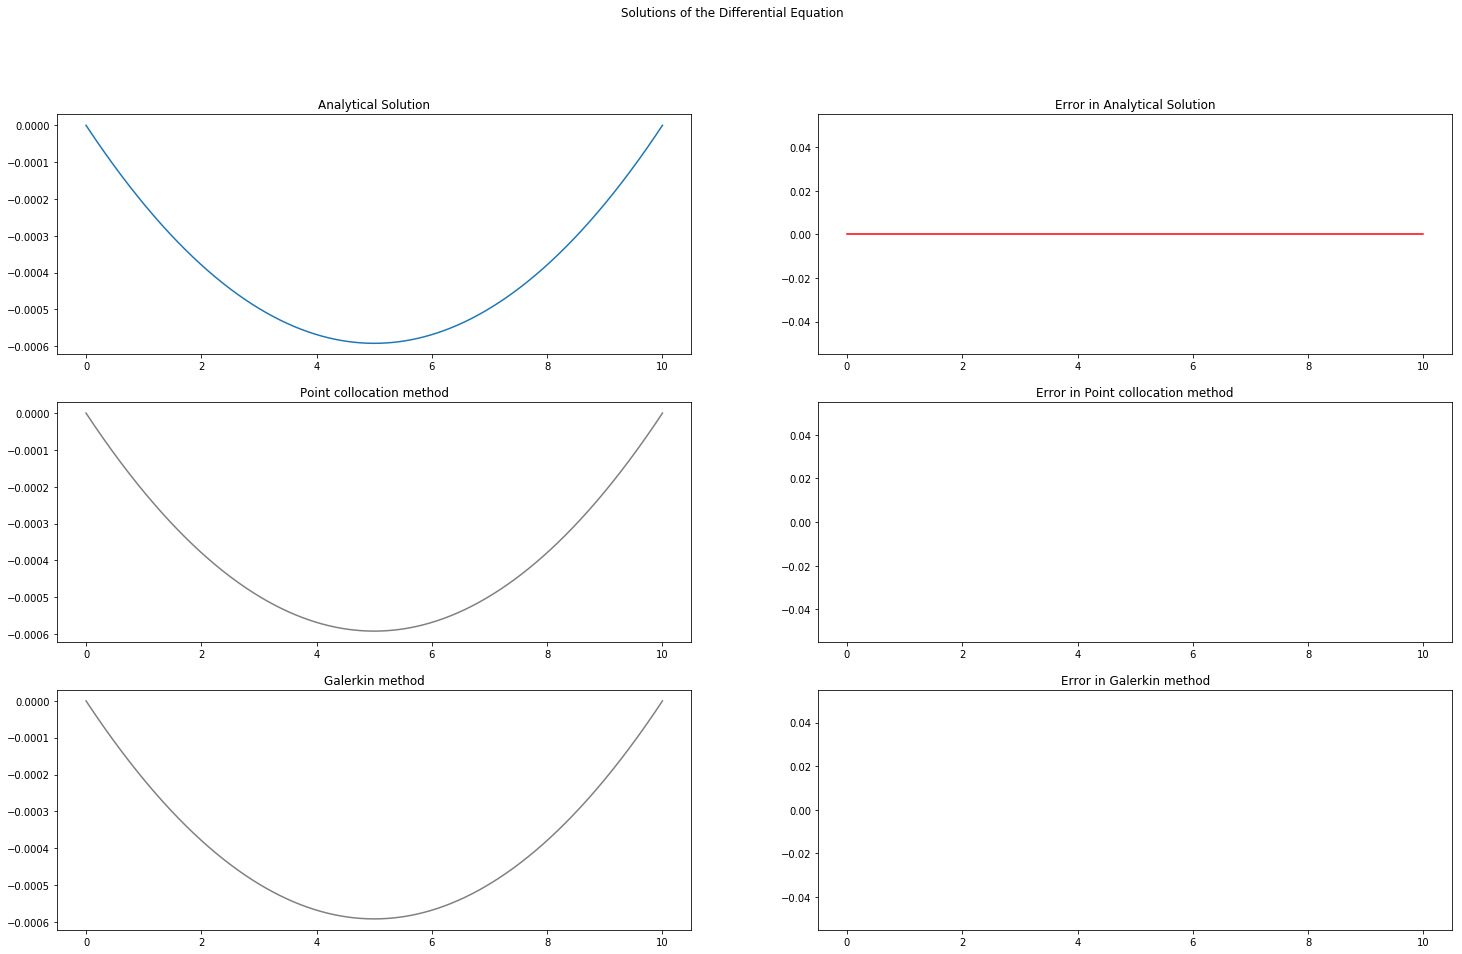

In [16]:

a = np.linspace(0,L,1001)
b = np.linspace(L,0,1001)
y_anal = -((Mo)/(2*E*I))*a*b
fig, axs = plt.subplots(3,2, sharey='col', sharex = 'row')
fig.suptitle('Solutions of the Differential Equation')
fig.set_figheight(15)
fig.set_figwidth(25)
axs[0,0].plot(a,y_anal)
axs[0,0].set_title('Analytical Solution')
err_anal = y_anal - y_anal
axs[0,1].plot(a,err_anal, color = 'red')
axs[0,1].set_title('Error in Analytical Solution')
axs[1,0].set_title('Point collocation method')
axs[1,1].set_title('Error in Point collocation method')
axs[1,0].plot(a,y_anal, color = 'grey')
axs[2,0].set_title('Galerkin method')
axs[2,1].set_title('Error in Galerkin method')
axs[2,0].plot(a,y_anal, color = 'grey')



Now we calculate the solution using the point collocation method, and plot it against the analytical solution. A single collocation point will be taken arbitrarily at x = L/2.

In [17]:
sin_der  = -(np.pi**2/L**2)*(np.sin((np.pi*a)/L)) 
#The residual must be zero at the collocation point. 
A_1 = -Mo/(sin_der[500]*E*I)
y_pntcl = -A_1*(np.sin((np.pi*a)/L))
axs[1,0].plot(a,y_pntcl, color = 'blue')
err_pntcl = y_pntcl - y_anal
axs[1,1].plot(a,err_pntcl, color = 'red')


Now we calculate the same using the galerkin method. In the galerkin method, the weight of the residual is set as the trial function itself.

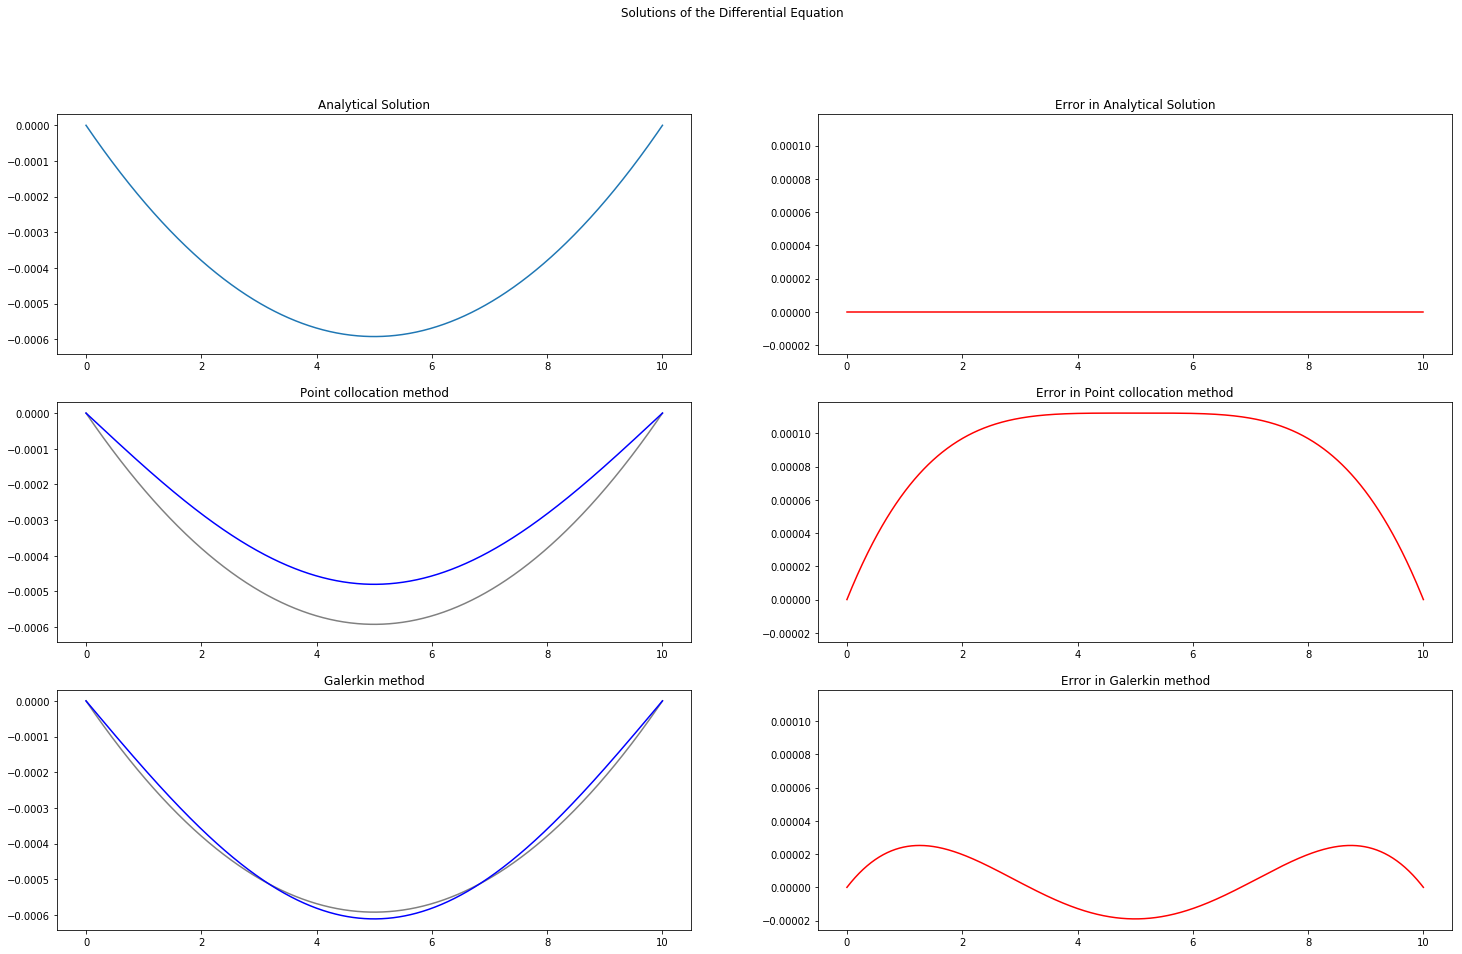

In [18]:
#integration done analytically
A_2 = 4*Mo*(L**2)/((np.pi**3)*E*I)
y_glrk = -A_2*(np.sin((np.pi*a)/L))
axs[2,0].plot(a,y_glrk, color = 'blue')
err_glrk = y_glrk - y_anal
axs[2,1].plot(a,err_glrk, color = 'red')
fig